# Code thuần thuật toán Linear Regression (Hồi quy tuyến tính)

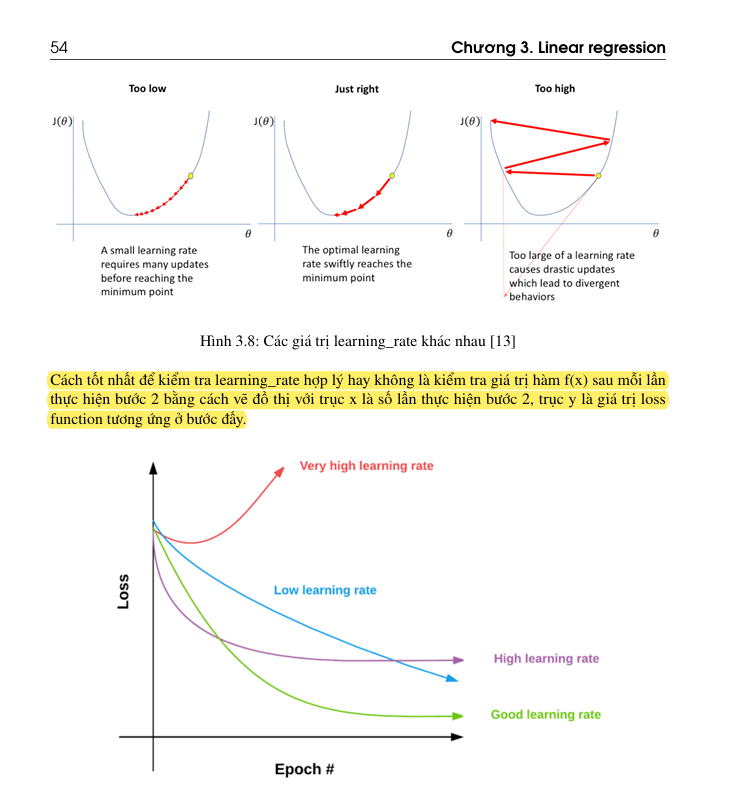 # numOfIteration và learning_rate
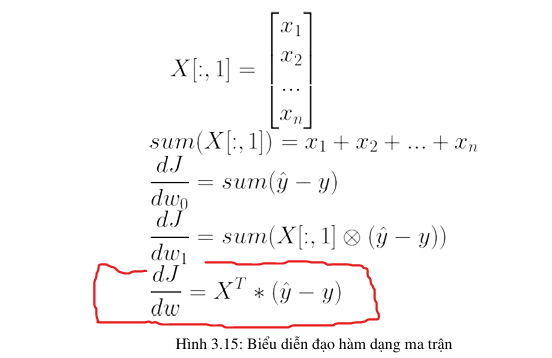
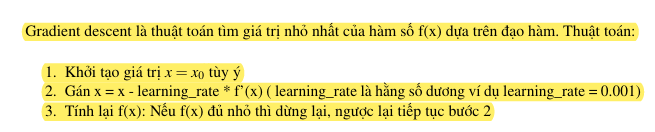

   Diện tích      Giá
0    30.0000  448.524
1    32.4138  509.248
2    34.8276  535.104
3    37.2414  551.432
4    39.6552  623.418
x [[  1.      30.    ]
 [  1.      32.4138]
 [  1.      34.8276]
 [  1.      37.2414]
 [  1.      39.6552]
 [  1.      42.069 ]
 [  1.      44.4828]
 [  1.      46.8966]
 [  1.      49.3103]
 [  1.      51.7241]
 [  1.      54.1379]
 [  1.      56.5517]
 [  1.      58.9655]
 [  1.      61.3793]
 [  1.      63.7931]
 [  1.      66.2069]
 [  1.      68.6207]
 [  1.      71.0345]
 [  1.      73.4483]
 [  1.      75.8621]
 [  1.      78.2759]
 [  1.      80.6897]
 [  1.      83.1034]
 [  1.      85.5172]
 [  1.      87.931 ]
 [  1.      90.3448]
 [  1.      92.7586]
 [  1.      95.1724]
 [  1.      97.5862]
 [  1.     100.    ]]
w [[0.]
 [1.]]
[13929872.64455245]
[10306582.37422079]
[7625999.18237673]
[5642849.69326854]
[4175675.71851866]
[3090230.83195734]
[2287196.82094014]
[1693096.06938209]
[1253568.35550934]
[928396.89128833]
[687828.48611463]
[509851.129

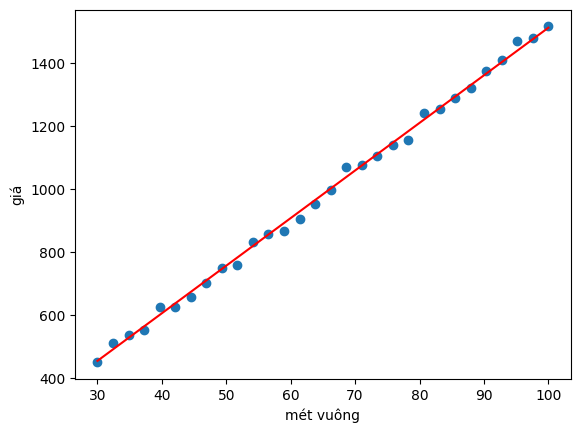

Giá nhà cho 50m^2 là :  [755.68795083]


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data_linear.csv').values # Đọc dữ liệu từ tệp CSV và lưu vào biến data
print(pd.read_csv('data_linear.csv').head())

# Số lượng mẫu
N = data.shape[0]
x = data[:, 0].reshape(-1, 1) # Lấy dữ liệu của biến đầu vào và đầu ra từ data
y = data[:, 1].reshape(-1, 1)

plt.scatter(x, y) # Vẽ biểu đồ scatter plot
plt.xlabel('mét vuông')  # Đặt tên trục x
plt.ylabel('giá')  # Đặt tên trục y

x = np.hstack((np.ones((N, 1)), x)) # Thêm cột 1 vào dữ liệu biến đầu vào x để tính toán hệ số điều chỉnh (intercept)
w = np.array([0.,1.]).reshape(-1,1) # Khởi tạo giá trị hệ số hồi quy ban đầu
numOfIteration = 100 # Số lượng vòng lặp
cost = np.zeros((numOfIteration,1)) # Mảng lưu trữ giá trị hàm mất mát trong quá trình huấn luyện
learning_rate = 0.000001 # Tốc độ học (learning rate)

# Huấn luyện mô hình
for i in range(1, numOfIteration): # THUẬT TOÁN Gradient descent và xem hình 3.15 
    r = np.dot(x, w) - y # Tính residual # y hay trừ y (độ chênh lệch)
    w[0] -= learning_rate*np.sum(r) # Cập nhật hệ số w0 (hệ số điều chỉnh) . 
    # Để tìm f(x) min ta phải tìm được x , tìm bằng cách 
    # Ta có x = x - learning_rate*f'(x) . sau đó tính lại x 
    # f(w[0]) min thì tìm w[0] . Ta có w[0] = w[0] - learning_rate*f'(w[0]) . Mặt khác ta cũng có : f'(w[0]) = sum(x.w - y)

    # Tương tự với dòng dưới ,từ công thức ta cũng suy ra được 
    w[1] -= learning_rate*np.sum(np.multiply(r, x[:,1].reshape(-1,1))) # Cập nhật hệ số w1 (hệ số của biến đầu vào)
    cost[i] = 0.5*np.sum(r*r) # này đang dùng công thức MSE # Tính toán giá trị hàm mất mát 
    # Sau khi w[0] và w[1] được cập nhật lại thì w chứa w[0] và w[1] cũng được update lại tính ra được độ chênh lệch mới : r = np.dot(x, w) - y 
    # Từ giá trị mới này tính ra được cost[i] mới (hàm mất mát) . Giá trị mất mát càng nhỏ càng tốt . 
    print(cost[i]) # Quang sát giá trị mất mát , càng ngày càng giảm dần cho đến khi gần như đạt cực tiểu có thể giảm tiếp nhưng giảm với số lượng rất nhỏ thì dừng 

predict = np.dot(x, w) # Dự đoán giá trị của y dựa trên x . Sau khi tính toán được w[0] và w[1] của w thì tính ra giá trị dự đoán 'y hat' là y predict
# từ ma trận x sau khi qua 2 hệ số w0 và w1 thì ra được ma trận y predict (y hat) 

# Tọa độ điểm đầu (x[0][1] ; predict[0]) 
# Tọa độ điểm cuối (x[N-1][1] ; predict[N-1])
plt.plot((x[0][1], x[N-1][1]),(predict[0], predict[N-1]), 'r') # Vẽ đường hồi quy . Nối từ điểm đầu cho đến điểm cuối dự đoán được . 
plt.show()

x1 = 50 # Dự đoán giá nhà cho một diện tích là 50 mét vuông
y1 = w[0] + w[1] * 50
print('Giá nhà cho 50m^2 là : ', y1)


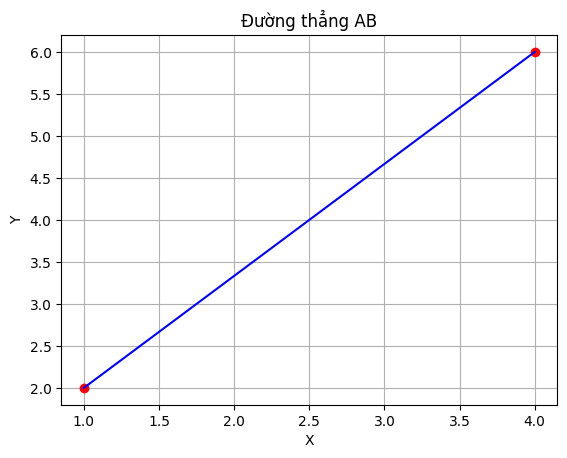

In [17]:
import matplotlib.pyplot as plt

# Tọa độ của điểm A và B
x1, y1 = 1, 2
x2, y2 = 4, 6

# Vẽ điểm A và B
plt.plot(x1, y1, 'ro')  # Điểm A
plt.plot(x2, y2, 'ro')  # Điểm B

# Vẽ đường thẳng AB
plt.plot([x1, x2], [y1, y2], 'b-')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Đường thẳng AB')
plt.grid(True)
plt.show()
